# Geely Auto - Car Price Consulting Case Study

### Problem Statement

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 

They want to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. Essentially, the company wants to know:

- Which variables are significant in predicting the price of a car
- How well those variables describe the price of a car

### Business Goal

You are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for the management to understand the pricing dynamics of a new market. 

## Importing Libraries

In [1071]:
## importing all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline

## Importing Data

In [1072]:
# Importing Data and printing head
auto = pd.read_csv('CarPrice_Assignment.csv')
auto.head(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.600000,...,130,mpfi,3.470000,2.680000,9.000000,111,5000,21,27,13495.000000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.600000,...,130,mpfi,3.470000,2.680000,9.000000,111,5000,21,27,16500.000000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.500000,...,152,mpfi,2.680000,3.470000,9.000000,154,5000,19,26,16500.000000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.800000,...,109,mpfi,3.190000,3.400000,10.000000,102,5500,24,30,13950.000000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.400000,...,136,mpfi,3.190000,3.400000,8.000000,115,5500,18,22,17450.000000


## Cleaning and Preparing Data

In [1073]:
# finding the sum of null values for all columns
auto.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

### as we see there are no null values, lets move ahead

In [1074]:
# Now lest describe our dataset
auto.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [1075]:
# as we see that car_ID does not makes any sense in predicting the proce we will drop this.
auto = auto.drop('car_ID', axis=1)
auto.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.600000,168.800000,...,130,mpfi,3.470000,2.680000,9.000000,111,5000,21,27,13495.000000
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.600000,168.800000,...,130,mpfi,3.470000,2.680000,9.000000,111,5000,21,27,16500.000000
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.500000,171.200000,...,152,mpfi,2.680000,3.470000,9.000000,154,5000,19,26,16500.000000
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.800000,176.600000,...,109,mpfi,3.190000,3.400000,10.000000,102,5500,24,30,13950.000000
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.400000,176.600000,...,136,mpfi,3.190000,3.400000,8.000000,115,5500,18,22,17450.000000


In [1076]:
# Fetching the car maker name and removing the model name
# Changing the column name to 'maker'
auto['CarName'] = auto['CarName'].str.split(' ').str.get(0)
auto.rename(columns={'CarName': 'maker'}, inplace=True)
auto.head()

,symboling,maker,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.600000,168.800000,...,130,mpfi,3.470000,2.680000,9.000000,111,5000,21,27,13495.000000
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.600000,168.800000,...,130,mpfi,3.470000,2.680000,9.000000,111,5000,21,27,16500.000000
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.500000,171.200000,...,152,mpfi,2.680000,3.470000,9.000000,154,5000,19,26,16500.000000
3,2,audi,gas,std,four,sedan,fwd,front,99.800000,176.600000,...,109,mpfi,3.190000,3.400000,10.000000,102,5500,24,30,13950.000000
4,2,audi,gas,std,four,sedan,4wd,front,99.400000,176.600000,...,136,mpfi,3.190000,3.400000,8.000000,115,5500,18,22,17450.000000


In [1077]:
# checking the maker column
auto.maker.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [1078]:
# As we see that there a couple of spelling mistakes, we need to fix them becasue they will add extra columns while encoding
def correct (x): 
    changed_name = x
    if(x=='maxda'):
        changed_name = 'mazda'
    elif (x=='Nissan'):
        changed_name = 'nissan'
    elif (x == 'porcshce'):
        changed_name = 'porsche'
    elif (x == 'toyouta'):
        changed_name = 'toyota'
    elif (x=='vokswagen'):
        changed_name = 'volkswagen'
    elif (x=='vw'):
        changed_name = 'volkswagen'
    elif (x=='alfa-romero'):
        changed_name = 'alfa-romeo'     
    return(changed_name)                

In [1079]:
# applying correct () to all columns 
auto['maker'] = auto['maker'].apply(correct)

In [1080]:
# checking the maker column for unique values
auto.maker.unique()

array(['alfa-romeo', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [1081]:
auto.enginetype.describe()

count     205
unique      7
top       ohc
freq      148
Name: enginetype, dtype: object

In [1082]:
# Only 1 car has engine type as DOHCV, this seems like a typo, replacing it with dohc

#replacing dohcv by dohc
dic_enginetype = {'dohcv':'dohc'}
auto['enginetype'] = auto['enginetype'].map(lambda x: dic_enginetype[x] if x in dic_enginetype.keys() else x)

## Handling highly correlated features

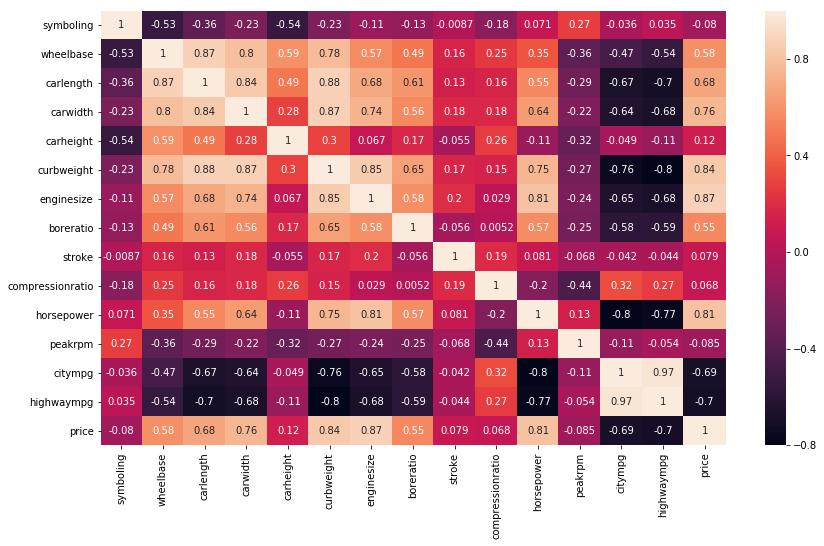

In [1083]:
# Let's see the correlation matrix 
plt.figure(figsize = (14,8))     # Size of the figure
sns.heatmap(auto.corr(),annot = True)

In [1084]:
# citympg is highly correlated to highwaympg, hence taking their mean and creating a new column
auto['mileage'] = (auto['citympg'] + auto['highwaympg'])/2
# dropping highwaympg and citympg columns
auto = auto.drop(['highwaympg','citympg'], 1)
# wheelbase is highly correlated to carlength, carwidth and curbweight hence removing it
auto = auto.drop('wheelbase', axis=1)

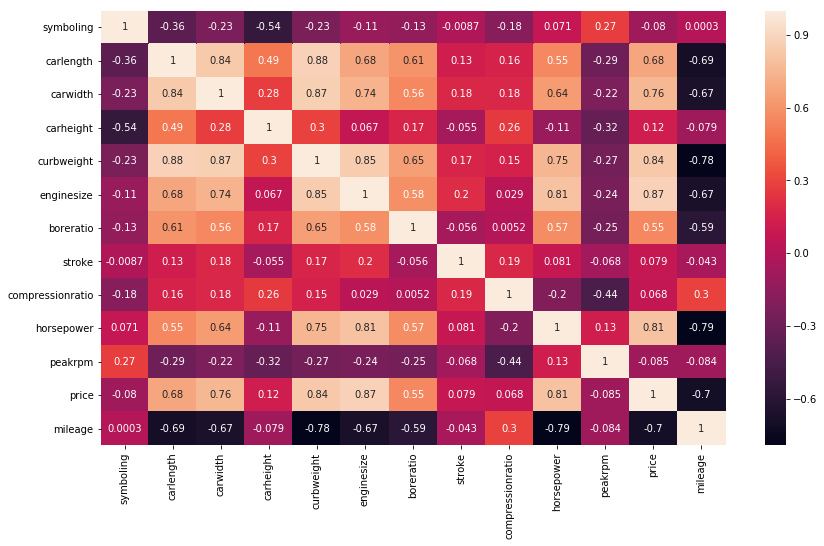

In [1085]:
# Let's see the correlation matrix 
plt.figure(figsize = (14,8))     # Size of the figure
sns.heatmap(auto.corr(),annot = True)

In [1086]:
# carlength is highly correlated to carwidth and curbweight hence removing carlength
auto = auto.drop('carlength', axis=1)
# enginesize is highly correlated with a lot of variables, hence removing it.
auto = auto.drop('enginesize', axis=1)

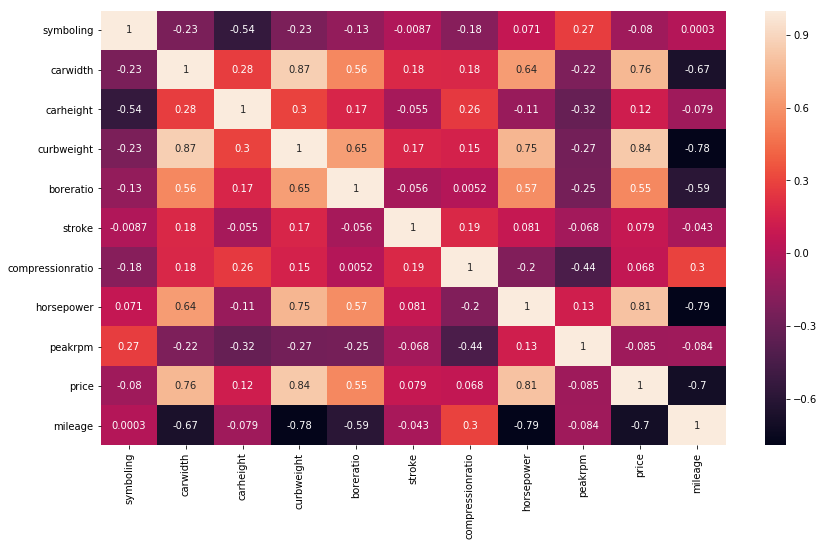

In [1087]:
# Let's see the correlation matrix 
plt.figure(figsize = (14,8))     # Size of the figure
sns.heatmap(auto.corr(),annot = True)

In [1088]:
# carwidth is highly correlated to curbweight and mileage hence removing it
auto = auto.drop('carwidth', axis=1)

### Handling Categorical Data

In [1089]:
# As the cylindernumber looks important and the encoding will not make much sense, lets analyse it
auto.cylindernumber.describe()

count      205
unique       7
top       four
freq       159
Name: cylindernumber, dtype: object

In [1090]:
# as only 7 unique values are there, lets get them
auto.cylindernumber.unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [1091]:
# Replacing the values in the cylindernumber column with there equivalent numbers
cylinders = {'four' : 4,
             'six' : 6,
             'five': 5,
             'three': 3,
             'twelve' : 12,
             'two' : 2,
             'eight' : 8}
auto['cylindernumber'].replace(cylinders, inplace=True)

In [1092]:
auto.doornumber.unique()

array(['two', 'four'], dtype=object)

In [1093]:
# Replacing the values in the doornumber column with their equivalent values
dic_doornumber = {'two':2, 'four':4}
auto['doornumber'] = auto['doornumber'].map(lambda x: dic_doornumber[x] if x in dic_doornumber.keys() else x)

In [1094]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 20 columns):
symboling           205 non-null int64
maker               205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null int64
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
price               205 non-null float64
mileage             205 non-null float64
dtypes: float64(6), int64(6), object(8)
memory usage: 32.1+ KB


## We can apply one-hot-encoding to all object type columns 

In [1095]:
auto = pd.get_dummies(auto, 
                           columns=['maker', 
                                    'fueltype', 
                                    'aspiration',  
                                    'carbody', 
                                    'drivewheel', 
                                    'enginelocation', 
                                    'enginetype', 
                                    'fuelsystem'])
auto.head()

,symboling,doornumber,carheight,curbweight,cylindernumber,boreratio,stroke,compressionratio,horsepower,peakrpm,...,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,2,48.800000,2548,4,3.470000,2.680000,9.000000,111,5000,...,0,0,0,0,0,0,0,1,0,0
1,3,2,48.800000,2548,4,3.470000,2.680000,9.000000,111,5000,...,0,0,0,0,0,0,0,1,0,0
2,1,2,52.400000,2823,6,2.680000,3.470000,9.000000,154,5000,...,1,0,0,0,0,0,0,1,0,0
3,2,4,54.300000,2337,4,3.190000,3.400000,10.000000,102,5500,...,0,0,0,0,0,0,0,1,0,0
4,2,4,54.300000,2824,5,3.190000,3.400000,8.000000,115,5500,...,0,0,0,0,0,0,0,1,0,0


In [1096]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 62 columns):
symboling               205 non-null int64
doornumber              205 non-null int64
carheight               205 non-null float64
curbweight              205 non-null int64
cylindernumber          205 non-null int64
boreratio               205 non-null float64
stroke                  205 non-null float64
compressionratio        205 non-null float64
horsepower              205 non-null int64
peakrpm                 205 non-null int64
price                   205 non-null float64
mileage                 205 non-null float64
maker_alfa-romeo        205 non-null uint8
maker_audi              205 non-null uint8
maker_bmw               205 non-null uint8
maker_buick             205 non-null uint8
maker_chevrolet         205 non-null uint8
maker_dodge             205 non-null uint8
maker_honda             205 non-null uint8
maker_isuzu             205 non-null uint8
maker_jaguar           

### Now we see that there is no object type column, hence we are good to go

In [1097]:
# verifying that there is no null value existing in the dataset
auto[auto.isnull().any(axis=1)]

,symboling,doornumber,carheight,curbweight,cylindernumber,boreratio,stroke,compressionratio,horsepower,peakrpm,...,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi


In [1098]:
auto.describe()

,symboling,doornumber,carheight,curbweight,cylindernumber,boreratio,stroke,compressionratio,horsepower,peakrpm,...,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,...,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,3.121951,53.724878,2555.565854,4.380488,3.329756,3.255415,10.142537,104.117073,5125.121951,...,0.063415,0.019512,0.053659,0.321951,0.014634,0.097561,0.004878,0.458537,0.043902,0.004878
std,1.245307,0.994966,2.443522,520.680204,1.080854,0.270844,0.313597,3.972040,39.544167,476.985643,...,0.244304,0.138655,0.225894,0.468368,0.120377,0.297446,0.069843,0.499498,0.205380,0.069843
min,-2.000000,2.000000,47.800000,1488.000000,2.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,52.000000,2145.000000,4.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,4.000000,54.100000,2414.000000,4.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,4.000000,55.500000,2935.000000,4.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,3.000000,4.000000,59.800000,4066.000000,12.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Selecting the X and y variables

In [1099]:
X = auto.drop('price', axis=1)

# Taking the labels (price)
y = auto['price']

## Rescaling the Features - standardization

In [1100]:
#defining a standardization function 
def standardize  (x): 
    return ( (x-np.mean(x))/ np.std(x) )
                                            
                                              
# applying standardize () to all columns 
X = X.apply(standardize)

## Not scaling y (https://learn.upgrad.com/v/course/162/question/81547)

In [1101]:
pd.set_option('float_format', '{:f}'.format)
X.describe()

,symboling,doornumber,carheight,curbweight,cylindernumber,boreratio,stroke,compressionratio,horsepower,peakrpm,...,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,...,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,...,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000
std,1.002448,1.002448,1.002448,1.002448,1.002448,1.002448,1.002448,1.002448,1.002448,1.002448,...,1.002448,1.002448,1.002448,1.002448,1.002448,1.002448,1.002448,1.002448,1.002448,1.002448
min,-2.281433,-1.130388,-2.430664,-2.055348,-2.207806,-2.923049,-3.789311,-0.793101,-1.422573,-2.049347,...,-0.260208,-0.141069,-0.238120,-0.689072,-0.121867,-0.328798,-0.070014,-0.920243,-0.214286,-0.070014
25%,-0.671472,-1.130388,-0.707626,-0.790449,-0.352887,-0.665314,-0.464834,-0.389299,-0.864871,-0.683286,...,-0.260208,-0.141069,-0.238120,-0.689072,-0.121867,-0.328798,-0.070014,-0.920243,-0.214286,-0.070014
50%,0.133509,0.884652,0.153893,-0.272552,-0.352887,-0.073121,0.110556,-0.288349,-0.231119,0.157366,...,-0.260208,-0.141069,-0.238120,-0.689072,-0.121867,-0.328798,-0.070014,-0.920243,-0.214286,-0.070014
75%,0.938490,0.884652,0.728239,0.730512,-0.352887,0.926204,0.494149,-0.187398,0.301233,0.787855,...,-0.260208,-0.141069,-0.238120,1.451227,-0.121867,-0.328798,-0.070014,1.086670,-0.214286,-0.070014
max,1.743470,0.884652,2.492302,2.907988,7.066788,2.258638,2.923575,3.244916,4.661448,3.099650,...,3.843076,7.088723,4.199567,1.451227,8.205689,3.041381,14.282857,1.086670,4.666667,14.282857


## Splitting Data into Training and Testing Sets

In [1102]:
# Spliting into 80% for training set and 20% for testing set so we can see our accuracy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

## Defining a method to calculate vif values

In [1103]:
# UDF for calculating vif value
def vif_cal(input_data, dependent_col):
    vif_df = pd.DataFrame( columns = ['Var', 'Vif'])
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y,x).fit().rsquared  
        vif=round(1/(1-rsq),2)
        vif_df.loc[i] = [xvar_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)

## RFE

In [1104]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [1105]:
# Running RFE with the output number of the variable equal to 9
lm = LinearRegression()
rfe = RFE(lm, 20)             # running RFE
rfe = rfe.fit(X_train, y_train)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)

[False False False  True  True False False  True  True False  True False
  True  True  True False False False False  True False False False False
  True False  True False  True False False False  True False  True False
 False  True False False False False False False False  True  True False
  True False False False  True False False False  True False False False
 False]
[41 39  5  1  1 32 18  1  1  3  1 23  1  1  1 17 10 14 25  1 37 40  4 15
  1 11  1 19  1 30 16 28  1  2  1 24  9  1 35 33  6 34  7 26 36  1  1 21
  1 29 31 22  1 38 27  8  1 20 12 13 42]


In [1106]:
col = X_train.columns[rfe.support_]

In [1107]:
print(col)

Index(['curbweight', 'cylindernumber', 'compressionratio', 'horsepower',
       'mileage', 'maker_audi', 'maker_bmw', 'maker_buick', 'maker_jaguar',
       'maker_peugeot', 'maker_porsche', 'maker_saab', 'maker_volvo',
       'fueltype_gas', 'carbody_convertible', 'enginelocation_front',
       'enginelocation_rear', 'enginetype_l', 'enginetype_rotor',
       'fuelsystem_idi'],
      dtype='object')


## Building model using sklearn

In [1108]:
# Creating X_train and X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]
X_test_rfe = X_test[col]

In [1109]:
# creating a new data set with only the selected columns to calculate vif without any issues
auto_rfe = X[['curbweight', 'cylindernumber', 'compressionratio', 'horsepower',
       'mileage', 'maker_audi', 'maker_bmw', 'maker_buick', 'maker_jaguar',
       'maker_peugeot', 'maker_porsche', 'maker_saab', 'maker_volvo',
       'fueltype_gas', 'carbody_convertible', 'enginelocation_front',
       'enginelocation_rear', 'enginetype_l', 'enginetype_rotor',
       'fuelsystem_idi']]
auto_rfe['price'] = y_train

C:\Users\amansrivasta\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


## Before putting the features for building models lets check for collinearity once more

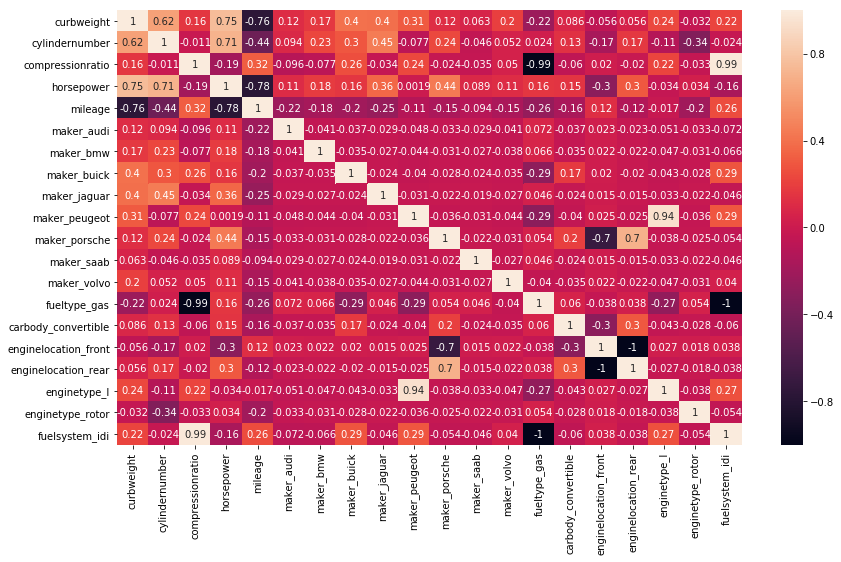

In [1110]:
# Let's see the correlation matrix 
plt.figure(figsize = (14,8))     # Size of the figure
sns.heatmap(X_train_rfe.corr(),annot = True)

In [1111]:
## Removing the variables which are > 90% correlated with other features from X_train and X_test and auto_rfe datasets
X_train_rfe = X_train_rfe.drop(['fuelsystem_idi','enginelocation_rear','fueltype_gas','enginetype_l'], axis=1)
X_test_rfe = X_test_rfe.drop(['fuelsystem_idi','enginelocation_rear','fueltype_gas','enginetype_l'], axis=1)
auto_rfe = auto_rfe.drop(['fuelsystem_idi','enginelocation_rear','fueltype_gas','enginetype_l'], axis=1)

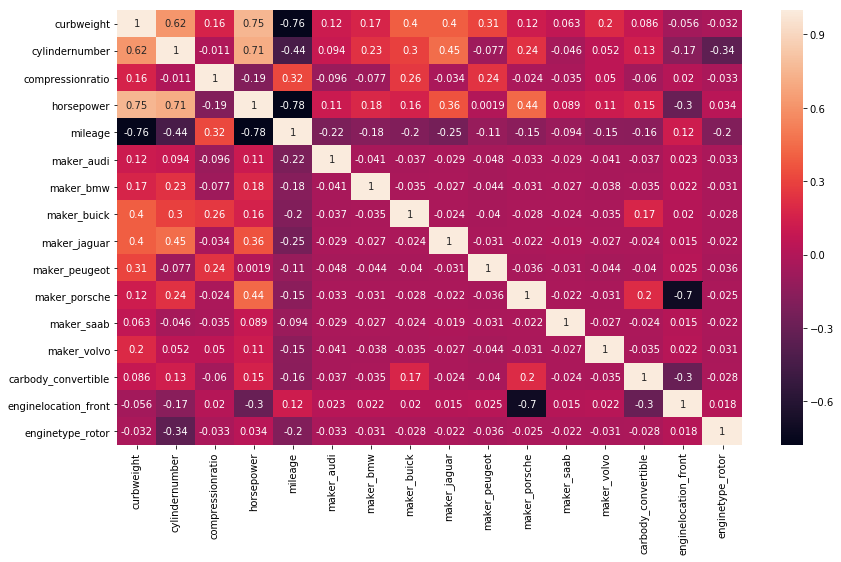

In [1112]:
# Let's see the correlation matrix again
plt.figure(figsize = (14,8))     # Size of the figure
sns.heatmap(X_train_rfe.corr(),annot = True)

In [1113]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [1114]:
X_train_rfe.shape

(164, 17)

In [1115]:
lm1 = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [1116]:
#Let's see the summary of our linear model
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     156.6
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           1.04e-83
Time:                        18:44:43   Log-Likelihood:                -1462.5
No. Observations:                 164   AIC:                             2959.
Df Residuals:                     147   BIC:                             3012.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.324e+04 

In [1117]:
# Calculating Vif value
vif_cal(input_data=auto_rfe, dependent_col="price")

,Var,Vif
0,curbweight,12.270000
3,horsepower,8.020000
4,mileage,7.330000
1,cylindernumber,3.810000
10,maker_porsche,3.150000
14,enginelocation_front,2.610000
2,compressionratio,2.420000
7,maker_buick,2.160000
9,maker_peugeot,1.880000
8,maker_jaguar,1.710000


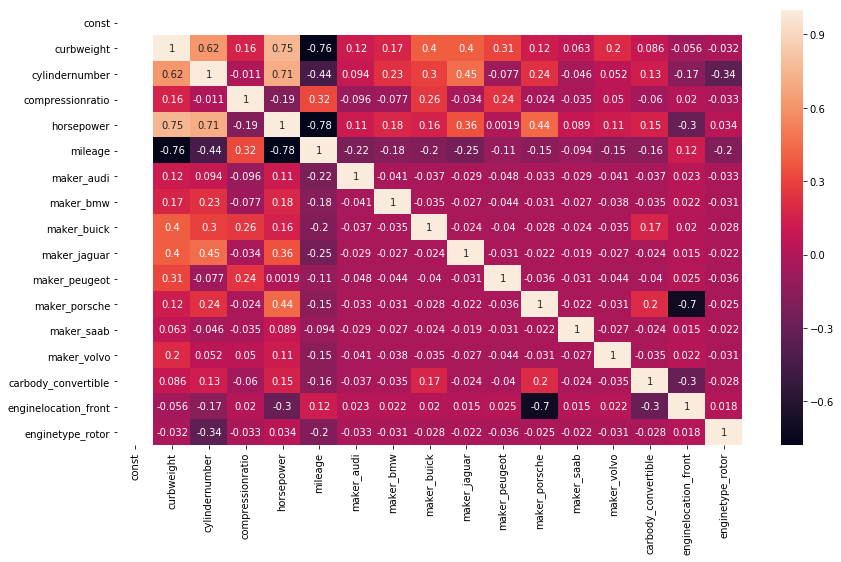

In [1118]:
# Let's see the correlation matrix 
plt.figure(figsize = (14,8))     # Size of the figure
sns.heatmap(X_train_rfe.corr(),annot = True)

## Dropping the Variable and Updating the Model

In [1119]:
# Dropping highly correlated variables and insignificant variables
X_train_rfe = X_train_rfe.drop('maker_peugeot', 1)

In [1120]:
 # Running the linear model
lm_2 = sm.OLS(y_train,X_train_rfe).fit()

In [1121]:
#Let's see the summary of our linear model
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     168.0
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           8.14e-85
Time:                        18:44:45   Log-Likelihood:                -1462.5
No. Observations:                 164   AIC:                             2957.
Df Residuals:                     148   BIC:                             3007.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.324e+04 

In [1122]:
# Calculating Vif value
vif_cal(input_data=auto_rfe.drop(["maker_peugeot"], axis=1), dependent_col="price")

,Var,Vif
0,curbweight,8.700000
4,mileage,7.290000
3,horsepower,7.160000
1,cylindernumber,3.780000
9,maker_porsche,3.150000
13,enginelocation_front,2.590000
2,compressionratio,2.400000
7,maker_buick,1.810000
8,maker_jaguar,1.600000
14,enginetype_rotor,1.580000


## Dropping the Variable and Updating the Model

In [1123]:
# Dropping highly correlated variables and insignificant variables
X_train_rfe = X_train_rfe.drop('cylindernumber', 1)

In [1124]:
# Running the linear model
lm_3 = sm.OLS(y_train,X_train_rfe).fit()

In [1125]:
#Let's see the summary of our linear model
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     180.4
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           8.43e-86
Time:                        18:44:45   Log-Likelihood:                -1462.9
No. Observations:                 164   AIC:                             2956.
Df Residuals:                     149   BIC:                             3002.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.325e+04 

In [1126]:
# Calculating Vif value
vif_cal(input_data=auto_rfe.drop(["maker_peugeot","cylindernumber"], axis=1), dependent_col="price")

,Var,Vif
0,curbweight,8.700000
3,mileage,7.180000
2,horsepower,5.130000
8,maker_porsche,3.140000
12,enginelocation_front,2.590000
1,compressionratio,2.400000
6,maker_buick,1.510000
7,maker_jaguar,1.400000
13,enginetype_rotor,1.270000
10,maker_volvo,1.180000


## Dropping the Variable and Updating the Model

In [1127]:
# Dropping highly correlated variables and insignificant variables
X_train_rfe = X_train_rfe.drop('compressionratio', 1)

In [1128]:
# Running the linear model
lm_4 = sm.OLS(y_train,X_train_rfe).fit()

In [1129]:
#Let's see the summary of our linear model
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     194.3
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           9.11e-87
Time:                        18:44:45   Log-Likelihood:                -1463.4
No. Observations:                 164   AIC:                             2955.
Df Residuals:                     150   BIC:                             2998.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.325e+04 

In [1130]:
# Calculating Vif value
vif_cal(input_data=auto_rfe.drop(["maker_peugeot","cylindernumber","compressionratio"], axis=1), dependent_col="price")

,Var,Vif
1,horsepower,4.760000
0,curbweight,4.610000
2,mileage,4.540000
7,maker_porsche,3.120000
11,enginelocation_front,2.560000
5,maker_buick,1.510000
6,maker_jaguar,1.360000
9,maker_volvo,1.170000
12,enginetype_rotor,1.160000
4,maker_bmw,1.120000


## Dropping the Variable and Updating the Model

In [1131]:
# Dropping highly correlated variables and insignificant variables
X_train_rfe = X_train_rfe.drop('horsepower', 1)

In [1132]:
# Running the linear model
lm_5 = sm.OLS(y_train,X_train_rfe).fit()

In [1133]:
#Let's see the summary of our linear model
print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     164.0
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           4.15e-80
Time:                        18:44:45   Log-Likelihood:                -1483.0
No. Observations:                 164   AIC:                             2992.
Df Residuals:                     151   BIC:                             3032.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.321e+04 

In [1134]:
# Calculating Vif value
vif_cal(input_data=auto_rfe.drop(["maker_peugeot","cylindernumber","compressionratio","horsepower"], axis=1), dependent_col="price")

,Var,Vif
0,curbweight,4.250000
1,mileage,3.360000
10,enginelocation_front,2.560000
6,maker_porsche,2.550000
4,maker_buick,1.510000
5,maker_jaguar,1.300000
8,maker_volvo,1.170000
11,enginetype_rotor,1.150000
2,maker_audi,1.100000
3,maker_bmw,1.100000


## Dropping the Variable and Updating the Model

In [1135]:
# Dropping highly correlated variables and insignificant variables
X_train_rfe = X_train_rfe.drop('mileage', 1)

In [1136]:
# Running the linear model
lm_6 = sm.OLS(y_train,X_train_rfe).fit()

In [1137]:
#Let's see the summary of our linear model
print(lm_6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     179.6
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           3.66e-81
Time:                        18:44:46   Log-Likelihood:                -1483.2
No. Observations:                 164   AIC:                             2990.
Df Residuals:                     152   BIC:                             3028.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.321e+04 

In [1138]:
# Calculating Vif value
vif_cal(input_data=auto_rfe.drop(["maker_peugeot","cylindernumber","compressionratio","horsepower","mileage"], axis=1), dependent_col="price")

,Var,Vif
5,maker_porsche,2.550000
9,enginelocation_front,2.540000
0,curbweight,1.920000
3,maker_buick,1.470000
4,maker_jaguar,1.280000
7,maker_volvo,1.170000
2,maker_bmw,1.090000
8,carbody_convertible,1.080000
1,maker_audi,1.050000
6,maker_saab,1.040000


## Dropping the Variable and Updating the Model

In [1139]:
# Dropping highly correlated variables and insignificant variables
X_train_rfe = X_train_rfe.drop('maker_saab', 1)

In [1140]:
# Running the linear model
lm_7 = sm.OLS(y_train,X_train_rfe).fit()

In [1141]:
#Let's see the summary of our linear model
print(lm_7.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     193.1
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           2.04e-81
Time:                        18:44:46   Log-Likelihood:                -1485.5
No. Observations:                 164   AIC:                             2993.
Df Residuals:                     153   BIC:                             3027.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.319e+04 

In [1142]:
# Calculating Vif value
vif_cal(input_data=auto_rfe.drop(["maker_peugeot","cylindernumber","compressionratio","horsepower","mileage","maker_saab"], axis=1), dependent_col="price")

,Var,Vif
5,maker_porsche,2.550000
8,enginelocation_front,2.540000
0,curbweight,1.870000
3,maker_buick,1.450000
4,maker_jaguar,1.270000
6,maker_volvo,1.160000
2,maker_bmw,1.080000
7,carbody_convertible,1.070000
1,maker_audi,1.050000
9,enginetype_rotor,1.010000


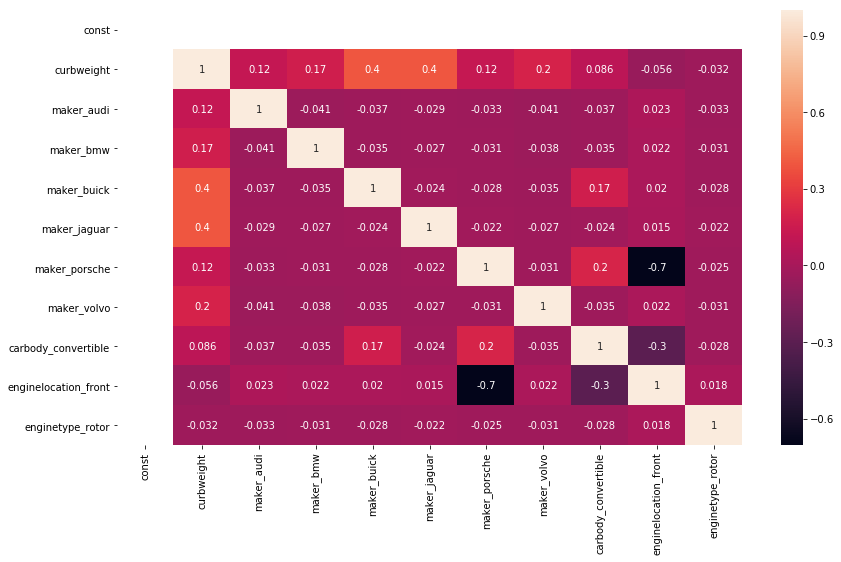

In [1143]:
# Let's see the correlation matrix 
plt.figure(figsize = (14,8))     # Size of the figure
sns.heatmap(X_train_rfe.corr(),annot = True)

## Dropping the Variable and Updating the Model

In [1144]:
# Dropping highly correlated variables and insignificant variables
X_train_rfe = X_train_rfe.drop('enginelocation_front', 1)

In [1145]:
# Running the linear model
lm_8 = sm.OLS(y_train,X_train_rfe).fit()

In [1146]:
#Let's see the summary of our linear model
print(lm_8.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     191.7
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           6.32e-79
Time:                        18:44:47   Log-Likelihood:                -1494.5
No. Observations:                 164   AIC:                             3009.
Df Residuals:                     154   BIC:                             3040.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.316e+04    

In [1147]:
# Calculating Vif value
vif_cal(input_data=auto_rfe.drop(["maker_peugeot","cylindernumber","compressionratio","horsepower","mileage","maker_saab","enginelocation_front"], axis=1), dependent_col="price")

,Var,Vif
0,curbweight,1.860000
3,maker_buick,1.450000
4,maker_jaguar,1.270000
6,maker_volvo,1.160000
2,maker_bmw,1.080000
5,maker_porsche,1.070000
1,maker_audi,1.050000
7,carbody_convertible,1.050000
8,enginetype_rotor,1.010000


In [1148]:
X_train_rfe.shape

(164, 10)

## Making Predictions Using the Final Model

### Predicting with model 8

In [1149]:
# Creating X_test_m6 dataframe by dropping variables from X_test_m8
X_test_rfe = X_test_rfe.drop(["maker_peugeot","cylindernumber","compressionratio","horsepower","mileage","maker_saab","enginelocation_front"], axis=1)

In [1150]:
X_test_rfe.shape

(41, 9)

In [1151]:
# Adding  constant variable to test dataframe
import statsmodels.api as sm  
X_test_rfe = sm.add_constant(X_test_rfe, has_constant='add')

In [1152]:
X_test_rfe.shape

(41, 10)

In [1153]:
# Making predictions
y_pred_m8 = lm_8.predict(X_test_rfe)

Text(0,0.5,'Housing Price')

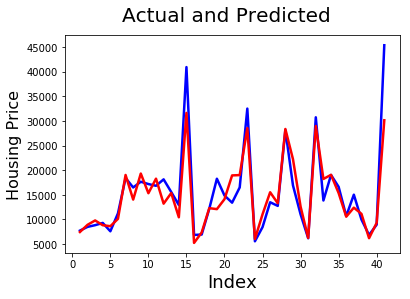

In [1154]:
# Actual vs Predicted
c = [i for i in range(1,42,1)]
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")     #Plotting Actual
plt.plot(c,y_pred_m8, color="red",  linewidth=2.5, linestyle="-")  #Plotting predicted
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Housing Price', fontsize=16)                       # Y-label

Text(0,0.5,'y_pred')

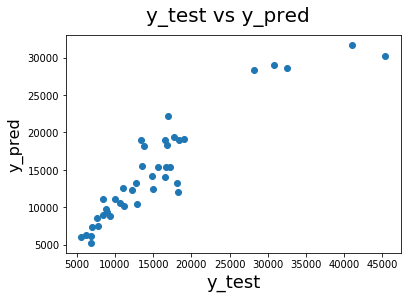

In [1155]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred_m8)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

Text(0,0.5,'ytest-ypred')

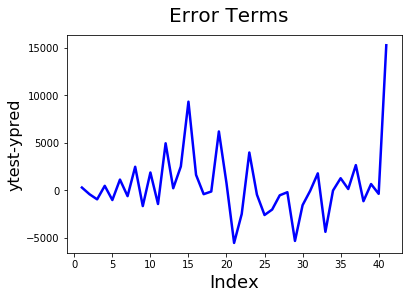

In [1156]:
# Error terms
fig = plt.figure()
c = [i for i in range(1,42,1)]
plt.plot(c,y_test-y_pred_m8, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('ytest-ypred', fontsize=16)                # Y-label

C:\Users\amansrivasta\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,0.5,'Index')

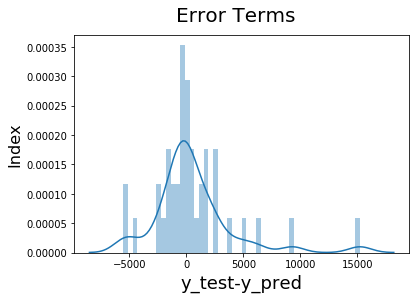

In [1157]:
fig = plt.figure()
sns.distplot((y_test-y_pred_m8),bins=50)
fig.suptitle('Error Terms', fontsize=20)                  # Plot heading 
plt.xlabel('y_test-y_pred', fontsize=18)                  # X-label
plt.ylabel('Index', fontsize=16)                          # Y-label

In [1158]:
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_pred_m8)))

RMSE : 3619.9796378734777


# This is extra!!
## Applying Gradient Boosting to this problem

### Gradient Boosting:
* Start off by learning a very simple model
* Take the error residuals from the first model and then try to predict the errors in the next iteration (also with a simple learner)
* Combine the two simple models to obtain a slightly better overall model
* At each iteration, the learner tries to reduce the errors (not eliminate it) by a certain learning rate. This is also the gradient of the model
* Keep iterating over the error residuals until you have an ensemble of simple learners which combine to produce a more complex model

#### Parameters:
- <b>n_estimators:</b> Number of boosting stages
- <b>max_depth:</b> Maximum depth of each estimator tree
- <b>min_samples_split: </b>Minimum samples in each subset when splitting the data set
- <b>learning_rate: </b>Defines the rate at which to converge to the optimal value
- <b>loss: </b>Type of loss function to optimize (ls == least squares)

In [1159]:
# importing GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

# setting the parameters
params = {'n_estimators': 500, 'max_depth': 6, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}

# creating model
gbr_model = GradientBoostingRegressor(**params)

# Calling fit on the created model
gbr_model.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=6, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=500, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

### Get R-square on training data

In [1160]:
gbr_model.score(X_train, y_train)

0.9982846497240655

### Make predictions on test data and compare with actual values

In [1161]:
y_predict = gbr_model.predict(X_test)

Populating the interactive namespace from numpy and matplotlib


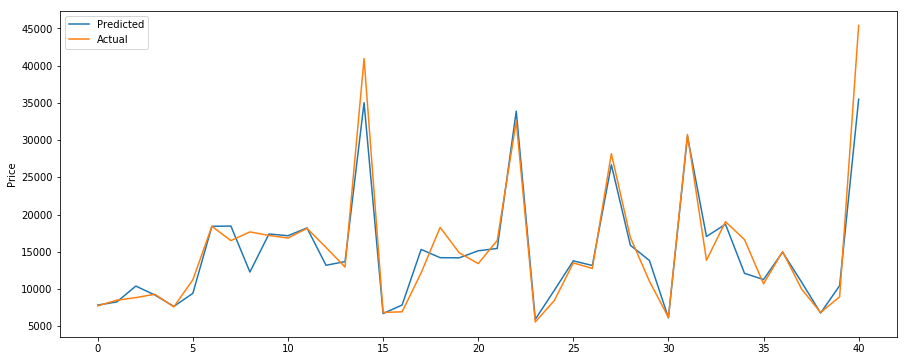

In [1162]:
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 6)

plt.plot(y_predict, label='Predicted')
plt.plot(y_test.values, label='Actual')
plt.ylabel('Price')

plt.legend()
plt.show()

### Calculate R-square score on test data

In [1163]:
r_square = gbr_model.score(X_test, y_test)
r_square

0.9177342153668633

### Calculate Mean Square Error

In [1164]:
from sklearn.metrics import mean_squared_error

gbr_model_mse = mean_squared_error(y_predict, y_test)
gbr_model_mse

6337655.667436235

### Root of Mean Square Error

In [1165]:
import math

math.sqrt(gbr_model_mse)

2517.470092659739

### num_estimators vs learning_rate:
- Higher learning rate should result in convergence with fewer estimators
- High value for learning rate risks skipping the optimal solution
- Low learning rate equates to high bias, high rate to high variance
- Need to strike the right balance between num_estimators and learning_rate

## For this we will use GridSearchCV which can give the the best parameters

In [1166]:
from sklearn.model_selection import GridSearchCV

num_estimators = [100, 200, 500]
learn_rates = [0.01, 0.02, 0.05, 0.1]
max_depths = [4, 6, 8]

param_grid = {'n_estimators': num_estimators,
              'learning_rate': learn_rates,
              'max_depth': max_depths}

grid_search = GridSearchCV(GradientBoostingRegressor(min_samples_split=2, loss='ls'),
                           param_grid, cv=3, return_train_score=True)
grid_search.fit(X_train, y_train)

grid_search.best_params_

{'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 500}

### Using the best parameters found above in creating GradientBoostingRegressor model

In [1167]:
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.02, 'loss': 'ls'}
gbr_model = GradientBoostingRegressor(**params)
gbr_model.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.02, loss='ls', max_depth=4, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=500, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

### Get R-square on training data

In [1168]:
gbr_model.score(X_train, y_train)

0.9972474620113603

## Make predictions on test data and compare with actual values

In [1169]:
y_predict = gbr_model.predict(X_test)

Populating the interactive namespace from numpy and matplotlib


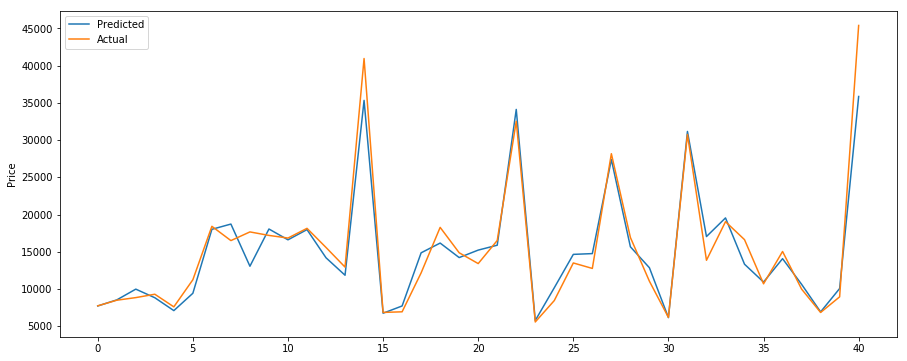

In [1170]:
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 6)

plt.plot(y_predict, label='Predicted')
plt.plot(y_test.values, label='Actual')
plt.ylabel('Price')

plt.legend()
plt.show()

## Calculate R-square score on test data

In [1171]:
r_square = gbr_model.score(X_test, y_test)
r_square

0.9319672604847904

## Calculate Mean Square Error

In [1172]:
gbr_model_mse = mean_squared_error(y_predict, y_test)
gbr_model_mse

5241159.238711098

## Root of Mean Square Error (RMSE)

In [1173]:
math.sqrt(gbr_model_mse)

2289.3578223403824